In [4]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
df= pd.read_csv('fmnist_small.csv')

In [6]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [7]:
x= df.iloc[:,1:].values
y =df.iloc[:,0].values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
#scaling features
x_train = x_train/255.0
x_test = x_test/255.0

In [19]:
#create customdataset
class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]



In [20]:
train_dataset = CustomDataset(x_train, y_train)

In [21]:
train_datset = CustomDataset(x_train, y_train)
test_dataset = CustomDataset(x_test, y_test)

In [22]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [27]:
#define NN class
class MyNN(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, x):
    return self.model(x)


In [28]:
epochs = 100
learning_rate = 0.001

In [29]:
model =MyNN(x_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [30]:
#training Loop
for epoch in range(epochs):
  total_epoch_loss = 0.0
  for batch_features, batch_labels in train_loader:
    outputs = model(batch_features)
    loss= criterion(outputs, batch_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_epoch_loss += loss.item()

  print(f"Epoch {epoch+1}/{epochs}, Loss: {total_epoch_loss/len(train_loader)}")

Epoch 1/100, Loss: 2.3044249184926353
Epoch 2/100, Loss: 2.2975272591908773
Epoch 3/100, Loss: 2.2905700047810873
Epoch 4/100, Loss: 2.2836971855163575
Epoch 5/100, Loss: 2.276914567947388
Epoch 6/100, Loss: 2.2701893424987794
Epoch 7/100, Loss: 2.26343105951945
Epoch 8/100, Loss: 2.2565483792622882
Epoch 9/100, Loss: 2.249506514867147
Epoch 10/100, Loss: 2.2422447268168133
Epoch 11/100, Loss: 2.2347421232859292
Epoch 12/100, Loss: 2.2269637393951416
Epoch 13/100, Loss: 2.2188201268513996
Epoch 14/100, Loss: 2.2102707131703694
Epoch 15/100, Loss: 2.2012848027547203
Epoch 16/100, Loss: 2.1918180720011393
Epoch 17/100, Loss: 2.181799306869507
Epoch 18/100, Loss: 2.1711701424916585
Epoch 19/100, Loss: 2.159864994684855
Epoch 20/100, Loss: 2.147845360438029
Epoch 21/100, Loss: 2.135090789794922
Epoch 22/100, Loss: 2.121561361948649
Epoch 23/100, Loss: 2.1072123146057127
Epoch 24/100, Loss: 2.092010250091553
Epoch 25/100, Loss: 2.075902131398519
Epoch 26/100, Loss: 2.058878606160482
Epoch 2

In [31]:
# set model to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [32]:
# evaluation code
total = 0
correct = 0
with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    outputs = model(batch_features)
    _, predicted = torch.max(outputs, 1)
    total = total + batch_labels.shape[0]
    correct = correct + (predicted == batch_labels).sum().item()
print(correct/total)

0.645


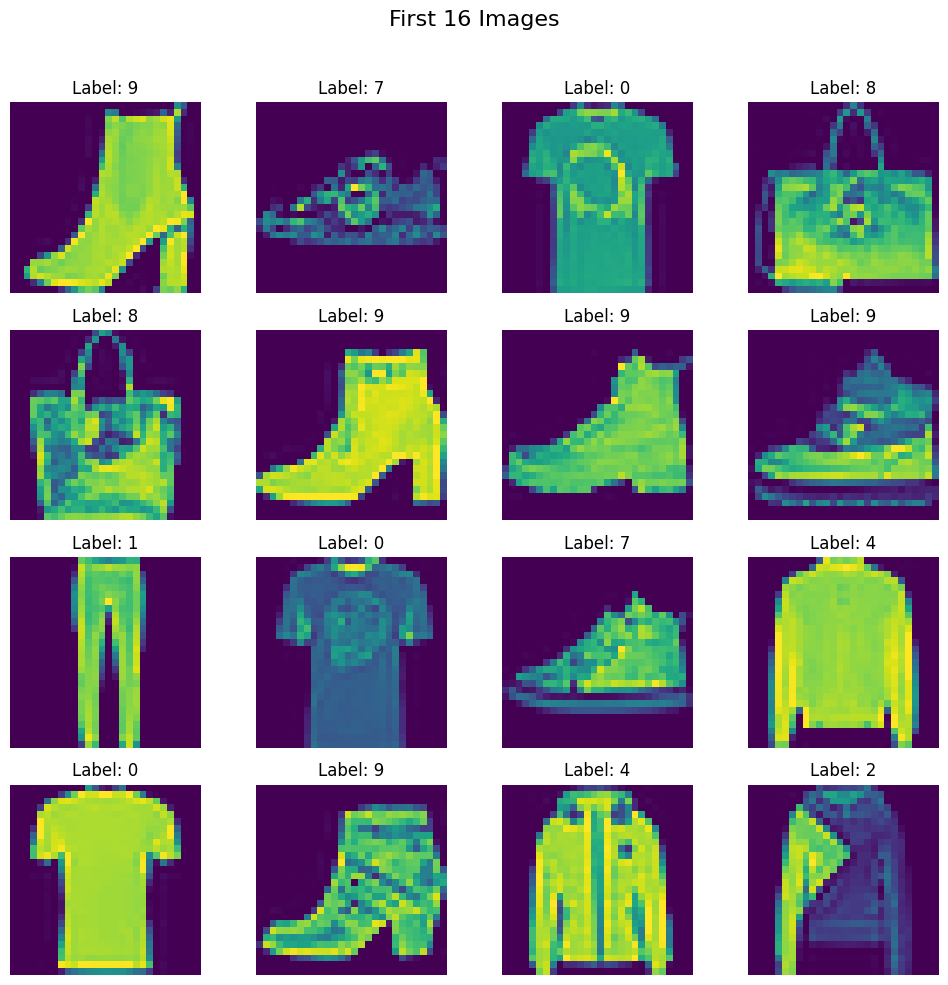

In [40]:
#Display some data from csv file
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {df.iloc[i, 0]}")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

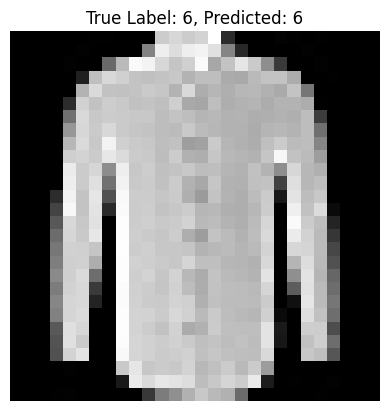

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def display_prediction(model, test_dataset):
    model.eval()
    random_index = np.random.randint(len(test_dataset))
    image, label = test_dataset[random_index]
    with torch.no_grad():
        output = model(image.unsqueeze(0))
        _, predicted_label = torch.max(output, 1)
    plt.imshow(image.numpy().reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {label}, Predicted: {predicted_label.item()}")
    plt.axis('off')
    plt.show()

display_prediction(model, test_dataset)

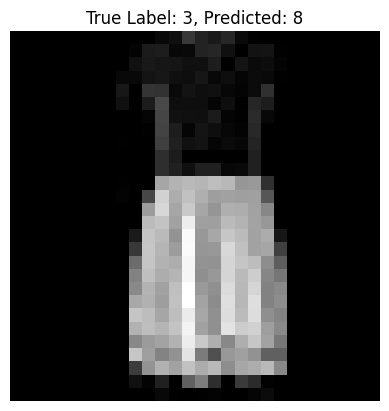

In [37]:

display_prediction(model, test_dataset)

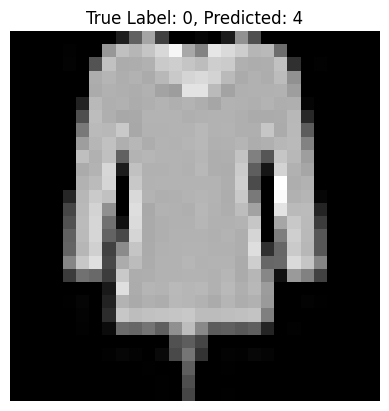

In [38]:
display_prediction(model, test_dataset)

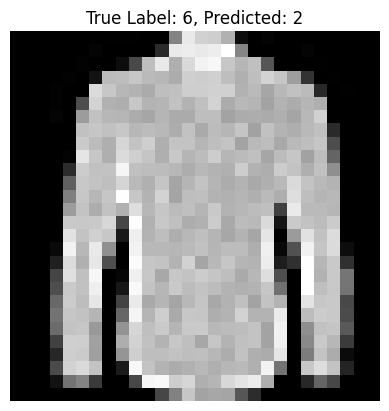

In [39]:
display_prediction(model, test_dataset)